# APS(Air Pressure System) Failure at Scania Trucks:

**Problem Statement**: The dataset is positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS.

**Source links:** https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

**Real world/Business Objectives and Constraints:**
- custom metric: [(False_negative * 500) + (False_positive * 10)]
- Note: This custom value should be as minimum as possible.

**Terms:**

- True Positives : Correctly classified component failures of a truck related to APS system.
- False Positives: Incorrectly classified component failures of a truck related to APS system.
- True Negatives : Correctly classified component failures of a truck not related to APS system.
- False Negatives: Incorrectly classified component failures of a truck not related to APS system.

- Precision      : (True Positives) / (True Positives + False Positives)
- Recall         : (True positives) / (True Positives + False Negatives)
- Precision      : says that how precise is our model detecting component failures of a truck related to APS system.
- Recall         : Amount of component failures of a truck related to the APS system our model is able to detect.

**Performance metric:**

- custom metric
- confusion metric

APS(Air Pressure System) failure at scania trucks.

- It consisting of 60k datapoints and 171 features including the response label.
- The given dataset is an imbalanced data, class distribution should be 98.333% of positive
  class and 1.667% of negative class.
- This dataset consisting of nan_values for that impute using the mean, median and mode.
  mean:it can tells the central tendency or average of given list of numbers
  median: middle value from the given list of numbers, befire that values should be sorted
          it cann't be impacted by the outliers.
  mode : most often or frequent occured numbers in the list of numbers, if no element 
         occered then there is no mode.
- Splitting the data into 80-20, from again 80 splitted 80-20.
- label distribution.
- Standardizinge the data for train, cv and test.

===> Model Building:
- Logstic regresssion ----> custom_value=11370
- Linear svm          ----> custom_value=11510
- Random Forest       ----> custom_value=30610
- xgboost             ----> custom_value=23130
- Stacking classier   ----> custom_value=23130

===> Balancing the data
Undersampling, Oversampling ----> For this applied Logistic regression.

In [3]:
#To ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime

from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
from imblearn.over_sampling import SMOTE

In [5]:
#Loading the train_dataset
data = pd.read_csv("train.csv")
print("Shape of the dataset "+str(data.shape))
print("Number of datapoints "+str(data.shape[0]))
print("Number of features "+str(data.shape[1]))
data.head()

Shape of the dataset (60000, 171)
Number of datapoints 60000
Number of features 171


,class,feature_1_000,feature_2_000,feature_3_000,feature_4_000,feature_5_000,feature_6_000,feature_7_000,feature_7_001,feature_7_002,...,feature_105_002,feature_105_003,feature_105_004,feature_105_005,feature_105_006,feature_105_007,feature_105_008,feature_105_009,feature_106_000,feature_107_000
0,neg,150472,na,na,na,na,na,0,0,0,...,1654734,748754,1447544,1207424,866890,508696,396736,0,na,na
1,neg,240,0,70,62,0,0,0,0,0,...,4248,1426,1834,1600,816,874,6,0,0,0
2,neg,59348,na,0,na,0,0,0,0,0,...,400926,198150,392978,426666,376902,271234,458198,25750,0,0
3,neg,31700,na,4868,4126,0,0,0,0,0,...,674688,223216,227050,43684,66,10,8,0,0,0
4,neg,17712,na,314,270,0,0,0,0,0,...,218418,69970,130530,327266,14178,38160,86,0,0,0


In [6]:
# Loading the test data
ace_test = pd.read_csv('test.csv')
print("Shape of the test_dataset "+str(ace_test.shape))
print("Number of test_datapoints "+str(ace_test.shape[0]))
print("Number of test_features "+str(ace_test.shape[1]))
ace_test.head()

Shape of the test_dataset (16000, 170)
Number of test_datapoints 16000
Number of test_features 170


,feature_1_000,feature_2_000,feature_3_000,feature_4_000,feature_5_000,feature_6_000,feature_7_000,feature_7_001,feature_7_002,feature_7_003,...,feature_105_002,feature_105_003,feature_105_004,feature_105_005,feature_105_006,feature_105_007,feature_105_008,feature_105_009,feature_106_000,feature_107_000
0,18,0,2130706432,14,0,0,0,0,0,0,...,236,62,88,32,44,44,0,0,0,0
1,2348,0,108,54,0,0,0,0,0,19858,...,3578,1686,3594,4598,7670,75024,600,0,0,0
2,32908,na,974,920,0,0,0,0,0,2828,...,423396,218246,724886,166960,37818,19134,11216,0,0,0
3,81234,na,474,428,0,0,0,0,0,314,...,1004734,612730,1494324,792354,73166,13406,11760,98,0,0
4,45600,na,2130706432,106,0,0,0,0,0,0,...,487932,246574,510892,584826,227078,65098,32766,0,0,0


In [7]:
#Take look at the outcome variable : 'class'
print(data['class'].value_counts())

neg    59000
pos     1000
Name: class, dtype: int64


- Given data_set is highly imbalanced dataset from that majority is negative class and minority class is positive class.

In [8]:
# Assign outcome as 0 if class is 'neg' and else 1 for 'pos'
data['class'] = [1 if i == 'pos' else 0 for i in data['class']]

In [9]:
# Loading the original test_y
ori_test_y = pd.read_csv("test_y.csv", header=None)

In [10]:
ori_test_y = [0 if x=='neg' else 1 for x in ori_test_y[0]]

In [11]:
# we know our class_labels are heavily skewed
print("Negative class ", round((data['class'].value_counts()[0]/len(data)) * 100, 3), "% of the dataset")
print("Positive class ", round((data['class'].value_counts()[1]/len(data)) * 100, 3), "% of the dataset")

Negative class  98.333 % of the dataset
Positive class  1.667 % of the dataset


Text(0.5, 1.0, 'Class distribution \n (0:negative class || 1:positive class)')

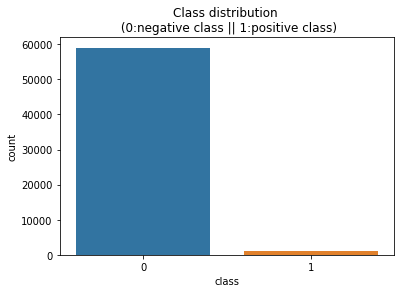

In [12]:
#Class distributions
sns.countplot(x='class', data=data)
plt.title("Class distribution \n (0:negative class || 1:positive class)")

In [13]:
# Replacing the 'na' with the 'NaN'
data = data.replace('na', np.NaN)

In [14]:
# Replacing the 'na' with the 'NaN' for test data
ace_test = ace_test.replace('na', np.NaN)

In [15]:
# Checking the null values are present in the dataset
data.isnull().sum().sort_values(ascending=False).head()

feature_43_000    49264
feature_42_000    48722
feature_41_000    47740
feature_40_000    46333
feature_68_000    46329
dtype: int64

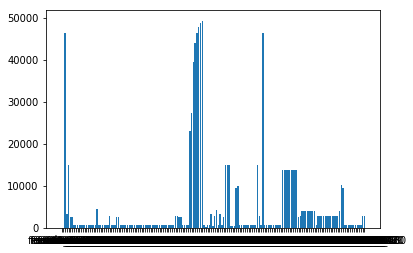

In [16]:
#Storing nan values of each features
count_nan_values = [i for i in data.isnull().sum()]
#ploting nan_values in each feature
plt.bar(data.columns, count_nan_values)
plt.show()

In [17]:
# # Distributions for some features
# fig, ax = plt.subplots(1, 4, figsize=(18, 4))

# fea_1_000_val = data['feature_1_000'].values
# sns.distplot(fea_1_000_val, ax=ax[0], color='r')
# ax[0].set_title('Distribution of feature_1_000', fontsize=14)
# ax[0].set_xlim([min(fea_1_000_val), max(fea_1_000_val)])

# fea_2_000_val = data['feature_2_000'].values
# sns.distplot(fea_2_000_val, ax=ax[1], color='b')
# ax[1].set_title('Distribution of feature_2_000', fontsize=14)
# ax[1].set_xlim([min(fea_2_000_val), max(fea_2_000_val)])

# fea_3_000_val = data['feature_3_000'].values
# sns.distplot(fea_3_000_val, ax=ax[2], color='b')
# ax[2].set_title('Distribution of feature_3_000', fontsize=14)
# ax[2].set_xlim([min(fea_3_000_val), max(fea_3_000_val)])

# fea_4_000_val = data['feature_4_000'].values
# sns.distplot(fea_4_000_val, ax=ax[3], color='r')
# ax[3].set_title('Distribution of feature_4_000', fontsize=14)
# ax[3].set_xlim([min(fea_4_000_val), max(fea_4_000_val)])

# plt.show()

In [18]:
############## Splitting the data ###############
X = data.drop('class', axis=1)
y = data['class']

#Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#splitting the data into train and test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Shape of the train data "+str(X_tr.shape))
print("Shape of the cross validation data "+str(X_cv.shape))
print("Shape of the test data "+str(X_test.shape))

Shape of the train data (38400, 170)
Shape of the cross validation data (9600, 170)
Shape of the test data (12000, 170)


## I. Mean Imputation:

In [19]:
# Imputing the missing values using the mean values
imp = Imputer(missing_values='NaN', strategy='mean', axis=0).fit(X_tr)
X_tr = imp.transform(X_tr)
X_cv = imp.transform(X_cv)
X_test = imp.transform(X_test)
# imp.fit(data)
# data = pd.DataFrame(data=imp.transform(data), columns = data.columns)

In [20]:
# Imputation for original test dataset
ace_test_imp = imp.transform(ace_test)

In [21]:
# # Checking the null values are present in the dataset. (There are no null values)
# data.isnull().sum().sort_values(ascending=False).head()

- By seeing the distributions how features are skewed.

In [22]:
################# Checking the distribution of the labels ######################

#Turning into arrays
# X_tr = X_tr.values
# X_cv = X_cv.values
# X_test = X_test.values
y_tr = y_tr.values
y_cv = y_cv.values
y_test = y_test.values

# Note : train_unique_label = [number of labels ex: 0 and 1] , train_counts_label = [No.of times unique 0 occurs, 1 occurs]
train_unique_label, train_counts_label = np.unique(y_tr, return_counts=True)
cv_unique_label, cv_counts_label = np.unique(y_cv, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print("Train data "+str(train_counts_label/ len(y_tr)))
print("cross_validation data "+str(cv_counts_label / len(y_cv)))
print("Test data "+str(test_counts_label/ len(y_test)))

Label Distributions: 

Train data [0.9840625 0.0159375]
cross_validation data [0.98104167 0.01895833]
Test data [0.98283333 0.01716667]


In [23]:
############### Scaling the data ############
"""StandardScaler() will normalize the features (each column of data) 
so that each column/feature/variable will have mean = 0 and standard deviation = 1."""

scaler = StandardScaler().fit(X_tr)
X_tr_std = scaler.transform(X_tr)
X_cv_std = scaler.transform(X_cv)
X_test_std = scaler.transform(X_test)

In [24]:
# Standardizing the original test data
ace_test_std = scaler.transform(ace_test_imp)

## Model Building using the mean imputation: 

In [25]:
def custom_metric(y_true, y_pred):
    # Calculating the false_positive
    false_pos = confusion_matrix(y_true, y_pred)[0][1]
    #rint("False positives  " +str(false_pos))
    # Calculating the false_negative
    false_neg = confusion_matrix(y_true, y_pred)[1][0]
    #print("False negatives " +str(false_neg))
    custom_metric_val = (false_pos*10) + (false_neg * 500)
    return custom_metric_val

In [26]:
def train_model(hyperparameters, train_x, train_y, cv_x, cv_y, loss):
    train_recall_scores = []
    cv_recall_scores = []
    train_custom_scores = []
    cv_custom_scores = []
    num_false_negs = []
    #Finding the best hyperparameter using the cross validation
    for x in hyperparameters:
        clf = SGDClassifier(alpha=x, loss=loss, random_state=42, class_weight='balanced')
        clf.fit(train_x, train_y)
        y_pred = clf.predict(cv_x)
        
        train_custom_scores.append(custom_metric(train_y, clf.predict(train_x)))
        train_recall_scores.append(recall_score(train_y, clf.predict(train_x)))
        print('For value of alpha = ', x, "The cv recall is:",recall_score(cv_y, y_pred, average='weighted'))
        cv_recall_scores.append(recall_score(cv_y, y_pred))
        print('For value of alpha =', x, "custom matric value is:",custom_metric(cv_y, y_pred))
        cv_custom_scores.append(custom_metric(cv_y, y_pred))
        false_neg = confusion_matrix(cv_y, y_pred)[1][0]
        num_false_negs.append(false_neg)
        print("\n")
    return train_recall_scores,cv_recall_scores,  train_custom_scores, cv_custom_scores, num_false_negs

In [27]:
def plot(hyperparameters, train_scores, cv_scores, label_x, label_y, title):
    plt.plot(train_scores, '-o', label=label_x)
    plt.plot(cv_scores, 'o-', label=label_y)
    plt.title(title)
    ax = plt.gca()
    plt.xticks(np.arange(len(hyperparameters)), hyperparameters, rotation='vertical')
    plt.legend()
    plt.show()

In [28]:
#Function for calculating the metrics
def test_metrics(y_test, y_pred):
    cm = pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
    sns.set(font_scale=1.5)
    sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g', vmin=0, vmax=12000)
    
    print("Precision on test data:", round(precision_score(y_test, y_pred) * 100 , 2))
    print("Recall on test data:", round(recall_score(y_test, y_pred) * 100 , 2))
    print("F1_score on test data:", round(f1_score(y_test, y_pred) * 100,2))
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [29]:
def testing_model(best_alpha, loss, train_x, train_y, cv_x, cv_y, test_x, test_y):
    ### Using the best_alpha finding train_loss, cv_loss and test_loss  
    clf = SGDClassifier(alpha=best_alpha, loss=loss, random_state=42, class_weight='balanced')
    clf.fit(train_x, train_y)
    
    # training recall
    tr_pred_y = clf.predict(train_x)
    print("Train recall with best_hyperparameter "+str(recall_score(train_y, tr_pred_y, average='weighted')))
    cm_tr = confusion_matrix(train_y, tr_pred_y)
    # cv recall 
    pred_y = clf.predict(cv_x)
    print("cross validation recall with best_hyperparameter "+str(recall_score(cv_y, pred_y, average='weighted')))

    # Test recall 
    te_pred_y = clf.predict(test_x)
    print("Test recall with best_hyperparameter "+str(recall_score(test_y, te_pred_y, average='weighted')))
    cm_te = confusion_matrix(test_y, te_pred_y)
    #print('roc_value: ', roc_auc_score(test_y, pred_y))
    # Calling function for calculating the metrics
    print("*"*20, "performance metrics", "*"*20)
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    #cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(cm_tr, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Train Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(cm_te, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Test Confusion matrix")
    plt.show()
    #     test_metrics(y_test, pred_y)
    print("Train custom_score is "+str(custom_metric(train_y, tr_pred_y)))
    print("Test custom_score is "+str(custom_metric(test_y, te_pred_y)))

## 1. Logistic Regression:

### 1.1: Training the model and hyperparameter tuning:

In [30]:
# Training the model and hyperparameter tunning.
alpha = [10 ** x for x in range(-5,4)]
tr_recall_scores, cv_recall_scores, train_custom_scores, cv_custom_scores, num_false_negs = train_model(alpha, X_tr_std, y_tr,
                                                                                                       X_cv_std,  y_cv, 'log')
# print("Before average :")
# print(train_custom_scores, cv_custom_scores)
## Averaging the train custom scores
train_custom_scores = np.array(train_custom_scores) / len(X_tr)
## Averaging the cross_validation scores
cv_custom_scores = np.array(cv_custom_scores) / len(X_cv)
# print("After average :")
# print(train_custom_scores, cv_custom_scores)

For value of alpha =  1e-05 The cv recall is: 0.96
For value of alpha = 1e-05 custom matric value is: 14130


For value of alpha =  0.0001 The cv recall is: 0.9709375
For value of alpha = 0.0001 custom matric value is: 14550


For value of alpha =  0.001 The cv recall is: 0.9704166666666667
For value of alpha = 0.001 custom matric value is: 12640


For value of alpha =  0.01 The cv recall is: 0.9688541666666667
For value of alpha = 0.01 custom matric value is: 9850


For value of alpha =  0.1 The cv recall is: 0.9714583333333333
For value of alpha = 0.1 custom matric value is: 11070


For value of alpha =  1 The cv recall is: 0.9615625
For value of alpha = 1 custom matric value is: 11040


For value of alpha =  10 The cv recall is: 0.9128125
For value of alpha = 10 custom matric value is: 12290


For value of alpha =  100 The cv recall is: 0.9045833333333333
For value of alpha = 100 custom matric value is: 13080


For value of alpha =  1000 The cv recall is: 0.9602083333333333
For valu

### 1.2: Taking the best hyperparameter using the less custom_score in cv:

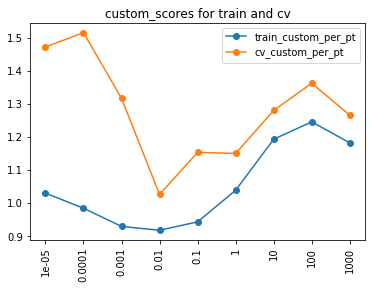

Best alpha using the less custom score 0.01
Train recall with best_hyperparameter 0.9644010416666666
cross validation recall with best_hyperparameter 0.9688541666666667
Test recall with best_hyperparameter 0.9673333333333334
******************** performance metrics ********************


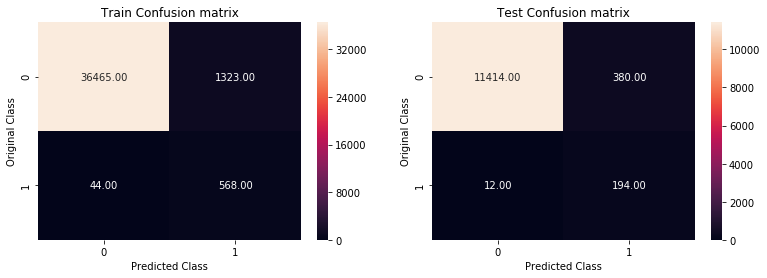

Train custom_score is 35230
Test custom_score is 9800


In [31]:
# ploting the custom_metric_values
plot(alpha, train_custom_scores, cv_custom_scores, 'train_custom_per_pt', 'cv_custom_per_pt', 'custom_scores for train and cv')
best_alpha = np.argmin(cv_custom_scores)
print("Best alpha using the less custom score "+str(alpha[best_alpha]))
testing_model(alpha[best_alpha], 'log', X_tr_std, y_tr, X_cv_std, y_cv, X_test_std, y_test)

### 1.3: Taking the best hyperparameter using the best F1_score:

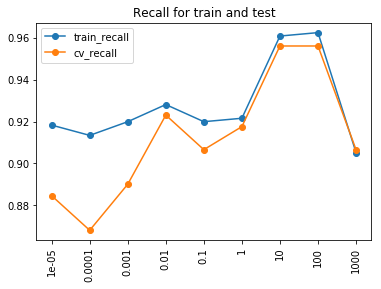

Best alpha using the less custom score 10
Train recall with best_hyperparameter 0.911328125
cross validation recall with best_hyperparameter 0.9128125
Test recall with best_hyperparameter 0.9128333333333334
******************** performance metrics ********************


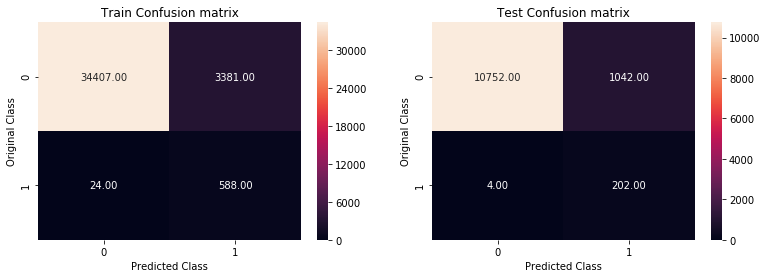

Train custom_score is 45810
Test custom_score is 12420


In [32]:
#ploting the recall values
plot(alpha, tr_recall_scores, cv_recall_scores, 'train_recall', 'cv_recall', 'Recall for train and test')
best_alpha = np.argmax(cv_recall_scores)
print("Best alpha using the less custom score "+str(alpha[best_alpha]))
testing_model(alpha[best_alpha], 'log', X_tr_std, y_tr, X_cv_std, y_cv, X_test_std, y_test)

**Finding the original test data custom score using the best hyperparameter(0.01):**

In [33]:
log_clf = SGDClassifier(alpha=0.01, loss='log', random_state=42, class_weight='balanced')
log_clf.fit(X_tr_std, y_tr)
ori_y_test_pred = log_clf.predict(ace_test_std)
print("custom_score for original test data is " +str(custom_metric(ori_test_y, ori_y_test_pred)))

custom_score for original test data is 15430


## 2. Linear svm:

### 2.1: Training the model and hyperparameter tuning:

In [34]:
# Training the model and hyperparameter tunning.
alpha = [10 ** x for x in range(-6, 3)]
tr_recall_scores, cv_recall_scores, train_custom_scores, cv_custom_scores, num_false_negs = train_model(alpha, X_tr_std, y_tr,
                                                                                                       X_cv_std,  y_cv, 'hinge')
# print("Before average :")
# print(train_custom_scores, cv_custom_scores)
## Averaging the train custom scores
train_custom_scores = np.array(train_custom_scores) / len(X_tr)
## Averaging the cross_validation scores
cv_custom_scores = np.array(cv_custom_scores) / len(X_cv)
# print("After average :")
# print(train_custom_scores, cv_custom_scores)

For value of alpha =  1e-06 The cv recall is: 0.948125
For value of alpha = 1e-06 custom matric value is: 9390


For value of alpha =  1e-05 The cv recall is: 0.9505208333333334
For value of alpha = 1e-05 custom matric value is: 10630


For value of alpha =  0.0001 The cv recall is: 0.9665625
For value of alpha = 0.0001 custom matric value is: 11050


For value of alpha =  0.001 The cv recall is: 0.9673958333333333
For value of alpha = 0.001 custom matric value is: 10480


For value of alpha =  0.01 The cv recall is: 0.9683333333333334
For value of alpha = 0.01 custom matric value is: 12350


For value of alpha =  0.1 The cv recall is: 0.9657291666666666
For value of alpha = 0.1 custom matric value is: 10150


For value of alpha =  1 The cv recall is: 0.9671875
For value of alpha = 1 custom matric value is: 11970


For value of alpha =  10 The cv recall is: 0.9573958333333333
For value of alpha = 10 custom matric value is: 11930


For value of alpha =  100 The cv recall is: 0.931666666

### 2.2: Taking the best hyperparameter using the less custom_score in cv:

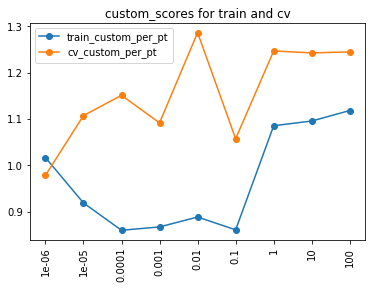

Best alpha using the less custom score 1e-06
Train recall with best_hyperparameter 0.9480989583333334
cross validation recall with best_hyperparameter 0.948125
Test recall with best_hyperparameter 0.952
******************** performance metrics ********************


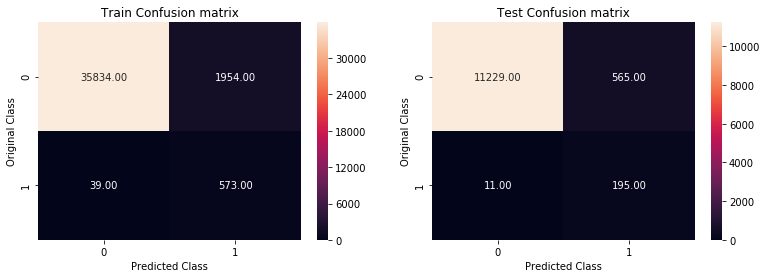

Train custom_score is 39040
Test custom_score is 11150


In [35]:
# ploting the custom_metric_values
plot(alpha, train_custom_scores, cv_custom_scores, 'train_custom_per_pt', 'cv_custom_per_pt', 'custom_scores for train and cv')
best_alpha = np.argmin(cv_custom_scores)
print("Best alpha using the less custom score "+str(alpha[best_alpha]))
testing_model(alpha[best_alpha], 'hinge', X_tr_std, y_tr, X_cv_std, y_cv, X_test_std, y_test)

### 2.3: Taking the best hyperparameter using the best F1_score:

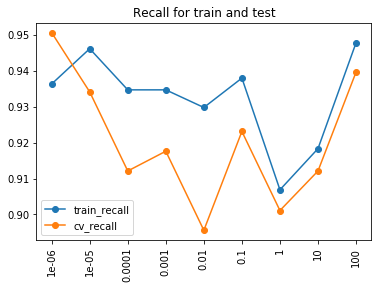

Best alpha using the less custom score 1e-06
Train recall with best_hyperparameter 0.9480989583333334
cross validation recall with best_hyperparameter 0.948125
Test recall with best_hyperparameter 0.952
******************** performance metrics ********************


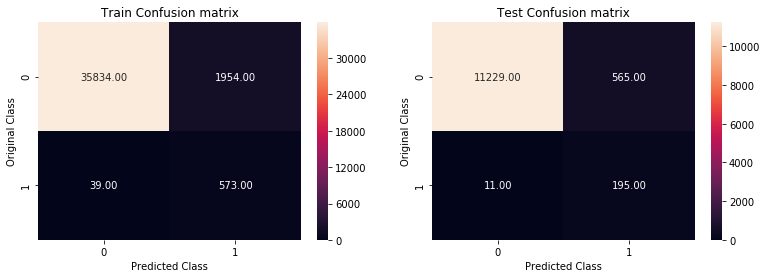

Train custom_score is 39040
Test custom_score is 11150


In [36]:
#ploting the recall values
plot(alpha, tr_recall_scores, cv_recall_scores, 'train_recall', 'cv_recall', 'Recall for train and test')
best_alpha = np.argmax(cv_recall_scores)
print("Best alpha using the less custom score "+str(alpha[best_alpha]))
testing_model(alpha[best_alpha], 'hinge', X_tr_std, y_tr, X_cv_std, y_cv, X_test_std, y_test)

**Finding the original test data custom score using the best hyperparameter(1e-06):**

In [37]:
svc_clf = SGDClassifier(alpha=1e-06, loss='hinge', random_state=42, class_weight='balanced')
svc_clf.fit(X_tr_std, y_tr)
ori_y_test_pred = svc_clf.predict(ace_test_std)
print("custom_score for original test data is " +str(custom_metric(ori_test_y, ori_y_test_pred)))

custom_score for original test data is 16020


## 3. xgboost

In [68]:
# Imputation
imp = Imputer(missing_values='NaN', strategy='mean', axis=0).fit(X)
train_x = imp.transform(X)
test_x = imp.transform(ace_test)

In [69]:
# Standardizing the data
scaler = StandardScaler().fit(train_x)
train_x_std = scaler.transform(train_x)
test_x_std = scaler.transform(test_x)

In [70]:
weights = np.zeros(len(y))
weights[y == 0] = 1
weights[y == 1] = 5
dtrain = xgb.DMatrix(train_x_std, label=y, weight=weights)
dtest  = xgb.DMatrix(test_x_std)

In [51]:
params = {'objective':'binary:logistic',
         'max_depth':3,
         'silent':1,
         'eta':0.09}
num_rounds = 100

In [52]:
ratio = float(np.sum(y==0)) / np.sum(y==1)
params['scale_pos_weight'] = ratio

In [54]:
bst = xgb.train(params, dtrain, num_rounds)
y_test_preds = (bst.predict(dtest)>0.5).astype('int')

In [55]:
print("custom_score for original test data is " +str(custom_metric(ori_test_y, y_test_preds)))

custom_score for original test data is 10660


# II. Median Imputation:

In [56]:
############## Splitting the data ###############
X = data.drop('class', axis=1)
y = data['class']

#Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#splitting the data into train and test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Shape of the train data "+str(X_tr.shape))
print("Shape of the cross validation data "+str(X_cv.shape))
print("Shape of the test data "+str(X_test.shape))



# Imputing the missing values using the mean values
imp = Imputer(missing_values='NaN', strategy='median', axis=0).fit(X_tr)
X_tr = imp.transform(X_tr)
X_cv = imp.transform(X_cv)
X_test = imp.transform(X_test)

# Imputation for original test dataset
ace_test_imp = imp.transform(ace_test)



y_tr = y_tr.values
y_cv = y_cv.values
y_test = y_test.values

# Note : train_unique_label = [number of labels ex: 0 and 1] , train_counts_label = [No.of times unique 0 occurs, 1 occurs]
train_unique_label, train_counts_label = np.unique(y_tr, return_counts=True)
cv_unique_label, cv_counts_label = np.unique(y_cv, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print("Train data "+str(train_counts_label/ len(y_tr)))
print("cross_validation data "+str(cv_counts_label / len(y_cv)))
print("Test data "+str(test_counts_label/ len(y_test)))




############### Scaling the data ############
"""StandardScaler() will normalize the features (each column of data) 
so that each column/feature/variable will have mean = 0 and standard deviation = 1."""

scaler = StandardScaler().fit(X_tr)
X_tr_std = scaler.transform(X_tr)
X_cv_std = scaler.transform(X_cv)
X_test_std = scaler.transform(X_test)


# Standardizing the original test data
ace_test_std = scaler.transform(ace_test_imp)

Shape of the train data (38400, 170)
Shape of the cross validation data (9600, 170)
Shape of the test data (12000, 170)
Label Distributions: 

Train data [0.9840625 0.0159375]
cross_validation data [0.98104167 0.01895833]
Test data [0.98283333 0.01716667]


## 1. Logistic Regression:

### 1.1 Training the model and hyperparameter tuning:

In [57]:
# Training the model and hyperparameter tunning.
alpha = [10 ** x for x in range(-5,4)]
tr_recall_scores, cv_recall_scores, train_custom_scores, cv_custom_scores, num_false_negs = train_model(alpha, X_tr_std, y_tr,
                                                                                                       X_cv_std,  y_cv, 'log')
## Averaging the train custom scores
train_custom_scores = np.array(train_custom_scores) / len(X_tr)
## Averaging the cross_validation scores
cv_custom_scores = np.array(cv_custom_scores) / len(X_cv)

For value of alpha =  1e-05 The cv recall is: 0.9320833333333334
For value of alpha = 1e-05 custom matric value is: 10930


For value of alpha =  0.0001 The cv recall is: 0.9661458333333334
For value of alpha = 0.0001 custom matric value is: 13540


For value of alpha =  0.001 The cv recall is: 0.9697916666666667
For value of alpha = 0.001 custom matric value is: 10740


For value of alpha =  0.01 The cv recall is: 0.9695833333333334
For value of alpha = 0.01 custom matric value is: 10270


For value of alpha =  0.1 The cv recall is: 0.9715625
For value of alpha = 0.1 custom matric value is: 12040


For value of alpha =  1 The cv recall is: 0.9630208333333333
For value of alpha = 1 custom matric value is: 10900


For value of alpha =  10 The cv recall is: 0.9169791666666667
For value of alpha = 10 custom matric value is: 11890


For value of alpha =  100 The cv recall is: 0.9092708333333334
For value of alpha = 100 custom matric value is: 12630


For value of alpha =  1000 The cv recal

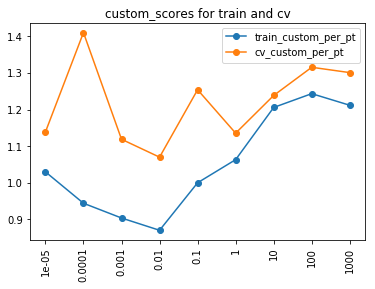

Best alpha using the less custom score 0.01
Train recall with best_hyperparameter 0.9666145833333334
cross validation recall with best_hyperparameter 0.9695833333333334
Test recall with best_hyperparameter 0.96925
******************** performance metrics ********************


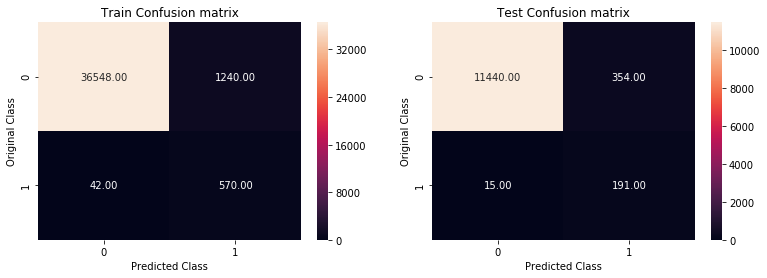

Train custom_score is 33400
Test custom_score is 11040


In [58]:
# ploting the custom_metric_values
plot(alpha, train_custom_scores, cv_custom_scores, 'train_custom_per_pt', 'cv_custom_per_pt', 'custom_scores for train and cv')
best_alpha = np.argmin(cv_custom_scores)
print("Best alpha using the less custom score "+str(alpha[best_alpha]))
testing_model(alpha[best_alpha], 'log', X_tr_std, y_tr, X_cv_std, y_cv, X_test_std, y_test)

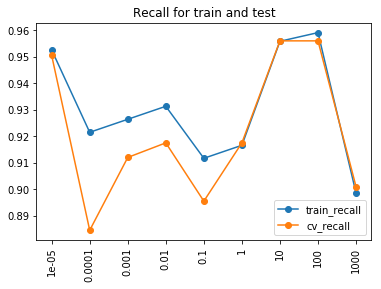

Best alpha using the less custom score 10
Train recall with best_hyperparameter 0.9138802083333334
cross validation recall with best_hyperparameter 0.9169791666666667
Test recall with best_hyperparameter 0.91675
******************** performance metrics ********************


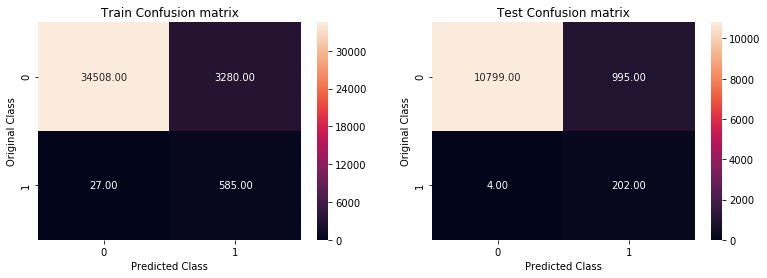

Train custom_score is 46300
Test custom_score is 11950


In [59]:
#ploting the recall values
plot(alpha, tr_recall_scores, cv_recall_scores, 'train_recall', 'cv_recall', 'Recall for train and test')
best_alpha = np.argmax(cv_recall_scores)
print("Best alpha using the less custom score "+str(alpha[best_alpha]))
testing_model(alpha[best_alpha], 'log', X_tr_std, y_tr, X_cv_std, y_cv, X_test_std, y_test)

In [60]:
log_clf = SGDClassifier(alpha=0.01, loss='log', random_state=42, class_weight='balanced')
log_clf.fit(X_tr_std, y_tr)
ori_y_test_pred = log_clf.predict(ace_test_std)
print("custom_score for original test data is " +str(custom_metric(ori_test_y, ori_y_test_pred)))

custom_score for original test data is 17690


## 2. xgboost:

In [61]:
# Imputation
imp = Imputer(missing_values='NaN', strategy='median', axis=0).fit(X)
train_x = imp.transform(X)
test_x = imp.transform(ace_test)

In [62]:
# Standardizing the data
scaler = StandardScaler().fit(train_x)
train_x_std = scaler.transform(train_x)
test_x_std = scaler.transform(test_x)

In [63]:
weights = np.zeros(len(y))
weights[y == 0] = 1
weights[y == 1] = 5
dtrain = xgb.DMatrix(train_x_std, label=y, weight=weights)
dtest  = xgb.DMatrix(test_x_std)

In [64]:
bst = xgb.train(params, dtrain, num_rounds)
y_test_preds = (bst.predict(dtest)>0.5).astype('int')
print("custom_score for original test data is " +str(custom_metric(ori_test_y, y_test_preds)))

custom_score for original test data is 11630


## LightGBM:

In [85]:
import lightgbm as lgb

In [96]:
param = {'num_leaves':10, 'num_trees':200, 'objective':'binary'}
#param['metric'] = 'auc'

In [97]:
weights = np.zeros(len(y))
weights[y == 0] = 1
weights[y == 1] = 5

In [98]:
train_data = lgb.Dataset(train_x_std, label=y, weights)

In [99]:
num_round = 10
bst = lgb.train(param, train_data, num_round)

In [100]:
# num_round = 10
# lgb.cv(param, train_data, num_round, nfold=5)

In [101]:
#ypred = bst.predict(test_x_std)
y_test_preds = (bst.predict(test_x_std)>0.5).astype('int')

In [102]:
print("custom_score for original test data is " +str(custom_metric(ori_test_y, y_test_preds)))

custom_score for original test data is 49940


## Random Forest:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_tr_std, y_tr)

In [ ]:
# Finding the best hyperparameters using the randommizied random search
rf_random.best_params_

In [ ]:
################ Saving the model ##############################
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = pickle_model.score(Xtest, Ytest)  
print("Test score: {0:.2f} %".format(100 * score))  
Ypredict = pickle_model.predict(Xtest) 

In [ ]:
# predicting the response_labels for an test data
y_preds = rf_random.best_params_.predict(X_test_std)
custom_metric(y_test, y_preds)

In [ ]:
num_trees = [100, 200, 500, 1000, 2000]
max_depth = [5, 10]
custom_scores = []
recall_scores = []
for trees in num_trees:
    for depth in max_depth:
        print("For n_estimators=", trees,  "and max_depth=", depth)
        clf = RandomForestClassifier(n_estimators=trees, criterion='gini',  max_depth=depth, random_state=42, n_jobs=3)
        clf.fit(X_tr_std, y_tr)
        y_pred = clf.predict(X_cv_std)
        
        print('For n_estimators = ', trees,'and for max_depth = ', depth, "The recall is:",recall_score(y_cv, y_pred))
        recall_scores.append(recall_score(y_cv, y_pred))
        print('For n_estimators = ', trees,'and for max_depth = ', depth, "custom matric value is:",custom_metric(y_cv, y_pred))
        custom_scores.append(custom_metric(y_cv, y_pred))
        print("\n")


In [ ]:
#Training the model using the best hyperparameter
best_params = np.argmin(custom_scores)
clf = RandomForestClassifier(n_estimators=num_trees[int(best_params/2)], criterion='gini',  max_depth=max_depth[int(best_params%2)], random_state=42, n_jobs=3)
clf.fit(X_tr_std, y_tr)
# training recall
pred_y = clf.predict(X_tr_std)
print("Train recall with best_hyperparameter "+str(recall_score(y_tr, pred_y)))

# cv recall 
pred_y = clf.predict(X_cv_std)
print("cross validation recall with best_hyperparameter "+str(recall_score(y_cv, pred_y)))

# Test recall 
pred_y = clf.predict(X_test_std)
print("Test recall with best_hyperparameter "+str(recall_score(y_test, pred_y)))
print('roc_value: ', roc_auc_score(y_test, pred_y))
# Calling function for calculating the metrics
print("*"*20, "performance metrics", "*"*20)
test_metrics(y_test, pred_y)
print("Test custom_score is "+str(custom_metric(y_test, pred_y)))

## xgboost:

In [52]:
########### Using the basic_model ##################
clf = xgb.XGBClassifier()
clf = clf.fit(X_tr_std, y_tr)
print(custom_metric(y_test, clf.predict(X_test_std)))
confusion_matrix(y_test, clf.predict(X_test_std))

28120


array([[11782,    12],
       [   56,   150]], dtype=int64)

In [53]:
ace_y_test = clf.predict(ace_test_std)
print("custom_score for original test data is " +str(custom_metric(ori_y, ace_y_test)))

custom_score for original test data is 61190


In [74]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, uniform
from sklearn.cross_validation import StratifiedKFold

In [75]:
cv = StratifiedKFold(y_tr, n_folds=10, shuffle=True)

In [76]:
# ############# Tuning the model using the random search cv ##########
# # A parameter grid for XGBoost
# params = {
#          'learning_rate':[0.001, 0.01, 0.1, 0.5],
#          'n_estimators': [50, 75, 100, 200, 250, 300],
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0, 0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

In [78]:
params = {
         'learning_rate':uniform(),
         'n_estimators': randint(1, 1001),
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1],
        'subsample': uniform(),
        'colsample_bytree': uniform(),
        'max_depth': [1, 2, 3, 4]
}

In [79]:
xgb = XGBClassifier( objective='binary:logistic',
                    silent=1)

In [70]:
# from sklearn.metrics import make_scorer
#  scoring = {'accuracy': make_scorer(accuracy_score)

In [80]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='recall', 
                                   n_jobs=4, cv=cv, verbose=3, random_state=1001 )
random_search.fit(X_tr_std, y_tr)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 32.7min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 123.3min finished


RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ... 0 0], n_folds=10, shuffle=True, random_state=None),
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=4,
          param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000D12DA20>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000D12D2B0>, 'min_child_weight': [1, 5, 10], 'gamma': [0, 0.5, 1], 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000D12D6A0>, 'colsample_bytr

In [81]:
random_search.best_params_

{'colsample_bytree': 0.5084839764321635,
 'gamma': 0,
 'learning_rate': 0.48817443749109535,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 467,
 'subsample': 0.8995780528415487}

In [82]:
# predicting the response_labels for an test data
y_preds = random_search.best_estimator_.predict(X_test_std)
custom_metric(y_test, y_preds), confusion_matrix(y_test, y_preds)

(21690, array([[11775,    19],
        [   43,   163]], dtype=int64))

In [ ]:
import xgboost as xgb

In [ ]:
weights = np.zeros(len(y_tr))
weights[y_tr == 0] = 1
weights[y_tr == 1] = 5
dtrain = xgb.DMatrix(X_tr_std, label=y_tr, weight=weights)
dtest  = xgb.DMatrix(ace_test_std)

In [ ]:
params = {'objective':'binary:logistic',
         'max_depth':1,
         'silent':1,
         'eta':1}
num_rounds = 100

In [ ]:
ratio = float(np.sum(y_tr==0)) / np.sum(y_tr==1)
params['scale_pos_weight'] = ratio

In [ ]:
bst = xgb.train(params, dtrain, num_rounds)
y_test_preds = (bst.predict(dtest)>0.5).astype('int')
custom_metric(ori_y, y_test_preds), confusion_matrix(ori_y, y_test_preds)

In [ ]:
depths = [3, 6, 9, 12, 15, 30]
recall_scores = []
custom_scores = []
for max_depth in depths:
    clf = xgb.XGBClassifier(max_depth=max_depth)
    clf = clf.fit(X_tr_std, y_tr)
    y_pred = clf.predict(X_cv_std)
    print('For n_estimators = 100 and for max_depth = ', max_depth, "The recall is:",recall_score(y_cv, y_pred))
    recall_scores.append(recall_score(y_cv, y_pred))
    print('For n_estimators = 100 and for max_depth = ', max_depth, "custom matric value is:",custom_metric(y_cv, y_pred))
    custom_scores.append(custom_metric(y_cv, y_pred))
    print("\n")

In [ ]:
#Training the model with the best hyperparameter
best_params = np.argmin(custom_scores)
clf = xgb.XGBClassifier(max_depth=depths[best_params])
clf = clf.fit(X_tr_std, y_tr)
# training recall
pred_y = clf.predict(X_tr_std)
print("Train recall with best_hyperparameter "+str(recall_score(y_tr, pred_y)))

# cv recall 
pred_y = clf.predict(X_cv_std)
print("cross validation recall with best_hyperparameter "+str(recall_score(y_cv, pred_y)))

# Test recall 
pred_y = clf.predict(X_test_std)
print("Test recall with best_hyperparameter "+str(recall_score(y_test, pred_y)))
print('roc_value: ', roc_auc_score(y_test, pred_y))
# Calling function for calculating the metrics
print("*"*20, "performance metrics", "*"*20)
test_metrics(y_test, pred_y)
print("Test custom_score is "+str(custom_metric(y_test, pred_y)))

## ROC_AUC plot for all the classifiers:

In [ ]:
# Logistic regression
log_clf = SGDClassifier(alpha=0.001, loss='log', random_state=42, class_weight='balanced')
log_clf.fit(X_tr_std, y_tr)
log_pred = log_clf.predict(X_tr_std)

# Linear_svm
svc_clf = SGDClassifier(alpha=0.001, loss='hinge', random_state=42, class_weight='balanced')
svc_clf.fit(X_tr_std, y_tr)
svc_pred = svc_clf.predict(X_tr_std)

# Random Forest
rf_clf =  RandomForestClassifier(n_estimators=200, criterion='gini',  max_depth=10, random_state=42, n_jobs=3)
rf_clf.fit(X_tr_std, y_tr)
rf_pred = rf_clf.predict(X_tr_std)

# xg_boost
xg_clf = xgb.XGBClassifier(max_depth=30)
xg_clf.fit(X_tr_std, y_tr)
xg_pred = xg_clf.predict(X_tr_std)


In [ ]:
############### Roc plot for all the classifiers #######################################
log_fpr, log_tpr, log_thresold = roc_curve(y_tr, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_tr, svc_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_tr, rf_pred)
xg_fpr, xg_tpr, xg_threshold = roc_curve(y_tr, xg_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr, xg_fpr, xg_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_tr, log_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_tr, svc_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_tr, rf_pred)))
    plt.plot(xg_fpr, xg_tpr, label='xg_boost Classifier Score: {:.4f}'.format(roc_auc_score(y_tr, xg_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr, xg_fpr, xg_tpr)
plt.show()

## Stacking Classifier:

In [ ]:
# Training the model with different hyperparameter
alpha_values = [0.0001,0.001,0.01,0.1,1,10]
recall_scores = []
custom_scores = []
for i in alpha_values:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[log_clf, svc_clf, rf_clf, xg_clf], meta_classifier=lr)
    sclf.fit(X_tr_std, y_tr)
    y_pred = sclf.predict(X_cv_std)
    print('For meta_classifier of hyperparameter ', i, "The recall is:",recall_score(y_cv, y_pred))
    recall_scores.append(recall_score(y_cv, y_pred))
    print('For meta_classifier of hyperparameter ', i, "custom matric value is:",custom_metric(y_cv, y_pred))
    custom_scores.append(custom_metric(y_cv, y_pred))
    print("\n")

In [ ]:
# Training and testing the model using the best hyperparameter
lr = LogisticRegression(C=i)
sclf = StackingClassifier(classifiers=[log_clf, svc_clf, rf_clf, xg_clf], meta_classifier=lr)
sclf.fit(X_tr_std, y_tr)

# training recall
pred_y = sclf.predict(X_tr_std)
print("Train recall with best_hyperparameter "+str(recall_score(y_tr, pred_y)))

# cv recall 
pred_y = sclf.predict(X_cv_std)
print("cross validation recall with best_hyperparameter "+str(recall_score(y_cv, pred_y)))

# Test recall 
pred_y = sclf.predict(X_test_std)
print("Test recall with best_hyperparameter "+str(recall_score(y_test, pred_y)))
print('roc_value: ', roc_auc_score(y_test, pred_y))
# Calling function for calculating the metrics
print("*"*20, "performance metrics", "*"*20)
test_metrics(y_test, pred_y)
print("Test custom_score is "+str(custom_metric(y_test, pred_y)))

### custom_scores for different classifiers without balanceing the data:

In [ ]:
############ custom metrics for different classifiers ###############
print("custum_score for Logistic regression "+str(custom_metric(y_test, log_clf.predict(X_test_std))))
print("custom_score for Linear_svm "+str(custom_metric(y_test, svc_clf.predict(X_test_std))))
print("custom_score for Random Forest "+str(custom_metric(y_test, rf_clf.predict(X_test_std))))
print("custom_score for xg_boost "+str(custom_metric(y_test, xg_clf.predict(X_test_std))))
print("custom_score for stacking classifier "+str(custom_metric(y_test, sclf.predict(X_test_std))))

## Balancing the using the undersampling and oversampling the data:

### 1. Undersampling: 

- Undersampling means majority samples should be equal to the minority samples.

In [ ]:
train_data_x = X_tr_std
train_data_y = y_tr
train_data = np.append(train_data_x, train_data_y.reshape((train_data_y.shape[0], 1)), axis=1)
train_data.shape

In [ ]:
# converting to an pandas dataframe
train_data = pd.DataFrame(train_data) 
train_data.head()

In [ ]:
# Renaming the class_label column from 170 to class
train_data = train_data.rename(columns={170: 'class'})
train_data.head()

In [ ]:
"""Our dataset is imbalanced by that we may get overfitting problem, to avoid that problem we can do random undersampling which 
   means making mojority class labels is equal to minority class. 
   - By doing the undersampling there is a problem which means loss of information. """

# Note: 170 column name is class_label

train_data = train_data.sample(frac=1)

pos_class = train_data.loc[train_data['class'] == 1]
neg_class = train_data.loc[train_data['class'] == 0][:train_data['class'].value_counts()[1]]

# Concatinating the positive and negative class
under_train_data = pd.concat([pos_class, neg_class])

# Shuffling the dataframe rows
under_train_data = under_train_data.sample(frac=1, random_state=42)

under_train_data.head()

In [ ]:
###################### Equally distributing ################################

print('Distribution of the Classes ')
print(under_train_data['class'].value_counts()/len(under_train_data))

sns.countplot('class', data=under_train_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
# Undersampling data of train dependent and independent variables
un_train_x = under_train_data.drop('class', axis=1)
un_train_y = under_train_data['class']

### Logistic regression:

In [ ]:
# Training the model 
alpha = [10 ** x for x in range(-5,1)]
tr_recall_scores, cv_recall_scores, log_custom_scores = train_model(alpha, un_train_x, un_train_y, X_cv_std, y_cv, 'log')
#ploting the recall and custom_metric_values
recall_plot(alpha, tr_recall_scores, cv_recall_scores)
#Finding the best hyperparameter
best_alpha = np.argmin(log_custom_scores)
print("best_alpha "+str(alpha[best_alpha]))
#Testing the model with the best hyperparameter
testing_model(best_alpha, 'log', un_train_x, un_train_y, X_cv_std, y_cv, X_test_std, y_test)

## Linear svm:

In [ ]:
# Training the model 
alpha = [10 ** x for x in range(-5,1)]
tr_recall_scores, cv_recall_scores, log_custom_scores = train_model(alpha, un_train_x, un_train_y, X_cv_std, y_cv, 'hinge')
#ploting the recall and custom_metric_values
recall_plot(alpha, tr_recall_scores, cv_recall_scores)
#Finding the best hyperparameter
best_alpha = np.argmin(log_custom_scores)
print("best_alpha "+str(alpha[best_alpha]))
#Testing the model with the best hyperparameter
testing_model(best_alpha, 'hinge', un_train_x, un_train_y, X_cv_std, y_cv, X_test_std, y_test)

## 2. Upsampling the data:

In [ ]:
sm = SMOTE(random_state=2)
up_train_x, up_train_y = sm.fit_sample(X_tr_std, y_tr.ravel())

In [ ]:
# Training the model 
alpha = [10 ** x for x in range(-5,1)]
tr_recall_scores, cv_recall_scores, log_custom_scores = train_model(alpha, up_train_x, up_train_y, X_cv_std, y_cv, 'log')
#ploting the recall and custom_metric_values
recall_plot(alpha, tr_recall_scores, cv_recall_scores)
#Finding the best hyperparameter
best_alpha = np.argmin(log_custom_scores)
print("best_alpha "+str(alpha[best_alpha]))
#Testing the model with the best hyperparameter
testing_model(best_alpha, 'log', up_train_x, up_train_y, X_cv_std, y_cv, X_test_std, y_test)